In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
enc = OrdinalEncoder()
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR, SVC


import warnings 
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Loan_ID is a unique identifier hence have removed from data

In [4]:
df = df.drop('Loan_ID',axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


Gender, Married, Dependents, Education, Self_Employed, Property_Area and Loan_Status are Object Dtype data which needs to change to Int

In [6]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are Null values which required to fill

In [7]:
print (df['Gender'].mode()) #using mode since Gender has only two values
print (df['Married'].mode()) #using mode since Married has only two values
print (df['Dependents'].mode()) #using mode since Dependents has only four values
print (df['Self_Employed'].mode()) #using mode since Self_Employed has only two values
print (df['LoanAmount'].mean()) #using mean since LoanAmount has continuous data
print (df['Loan_Amount_Term'].mode()) #using mode since Gender has only ten values
print (df['Credit_History'].mode()) #using mode since Gender has only two values

0    Male
dtype: object
0    Yes
dtype: object
0    0
dtype: object
0    No
dtype: object
146.41216216216216
0    360.0
dtype: float64
0    1.0
dtype: float64


In [8]:
df['Gender'] = df['Gender'].fillna('Male')
df['Married'] = df['Married'].fillna('Yes')
df['Dependents'] = df['Dependents'].fillna('0')
df['Self_Employed'] = df['Self_Employed'].fillna('No')
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(360.0)
df['Credit_History'] = df['Credit_History'].fillna(1.0)

In [9]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Have filled all the NaN

In [10]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


Data looks fine to encode into Int

In [11]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

Endcoded data into Int

In [12]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [13]:
x = df.drop(['Loan_Status'],axis=1)
y = df['Loan_Status']

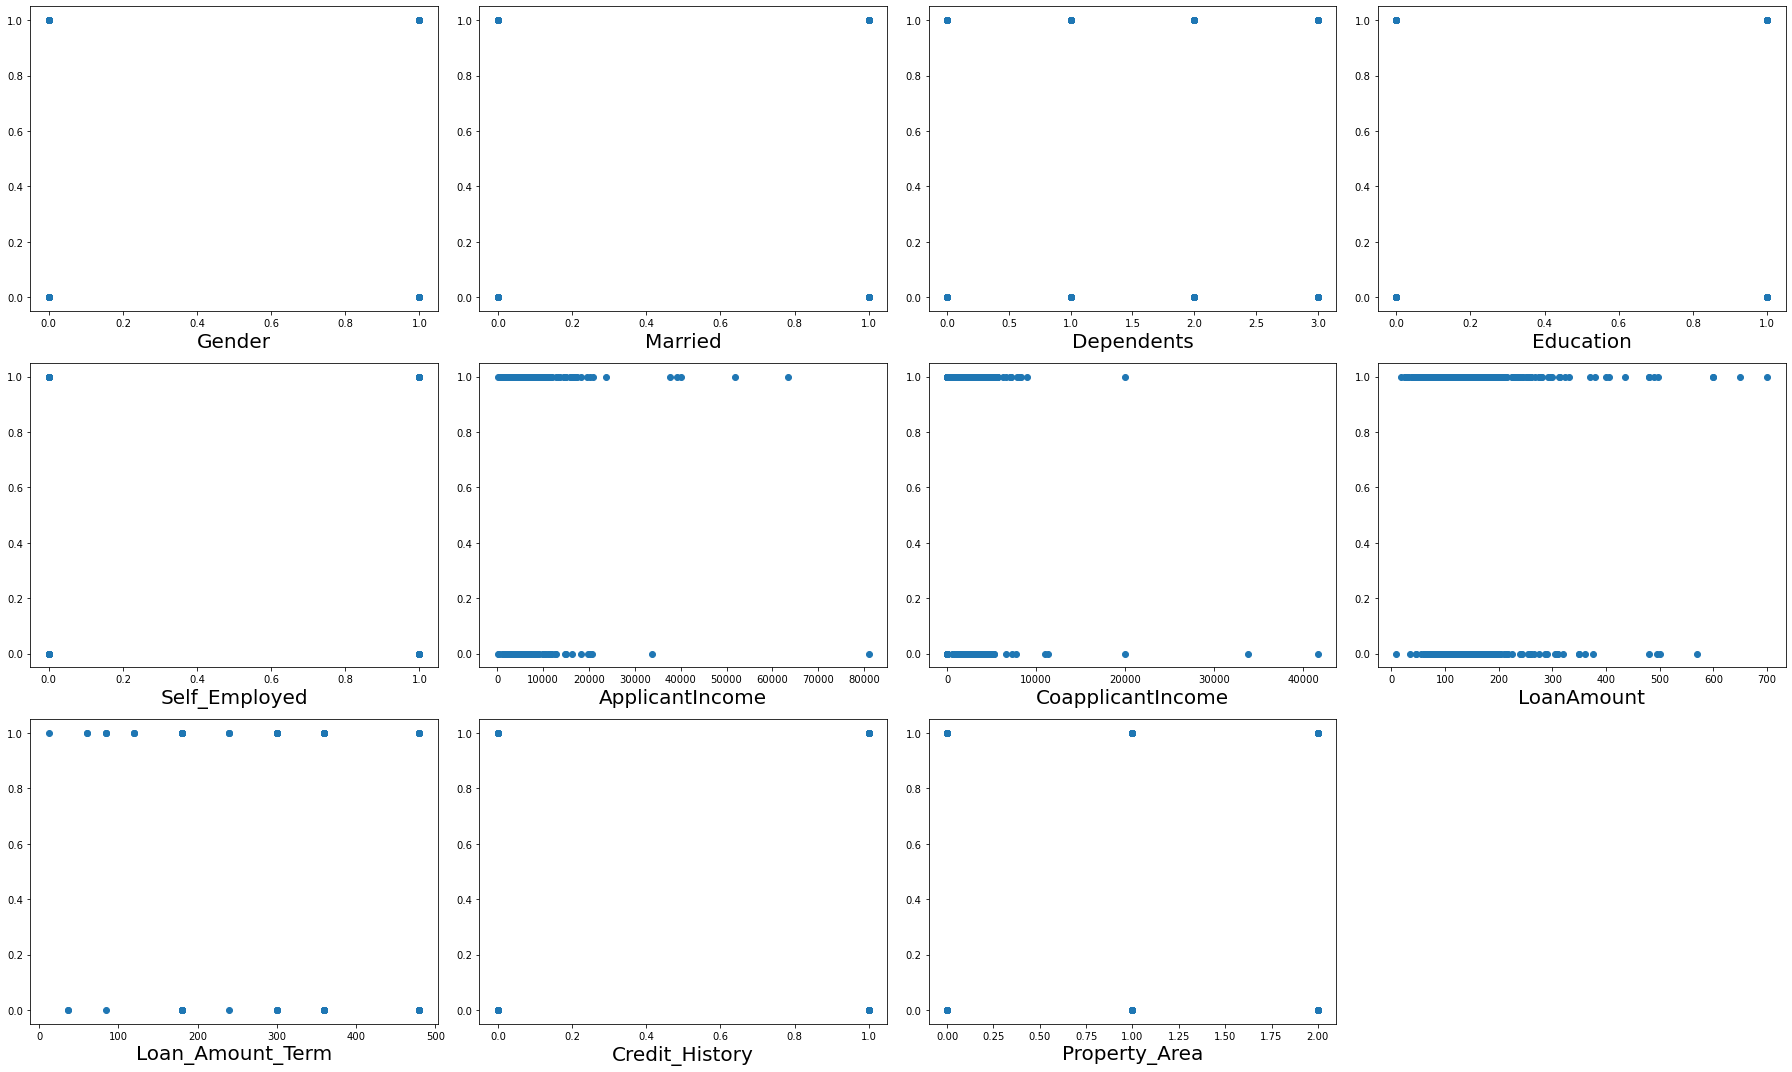

In [14]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 12:
        ax = plt.subplot(3,4,plotno)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

ApplicantIncome, CoapplicantIncome, LoanAmount and Loan_Amount_Term has relationship with Loan_Status 

In [15]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [16]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

Gender, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term and Credit_History has skewness

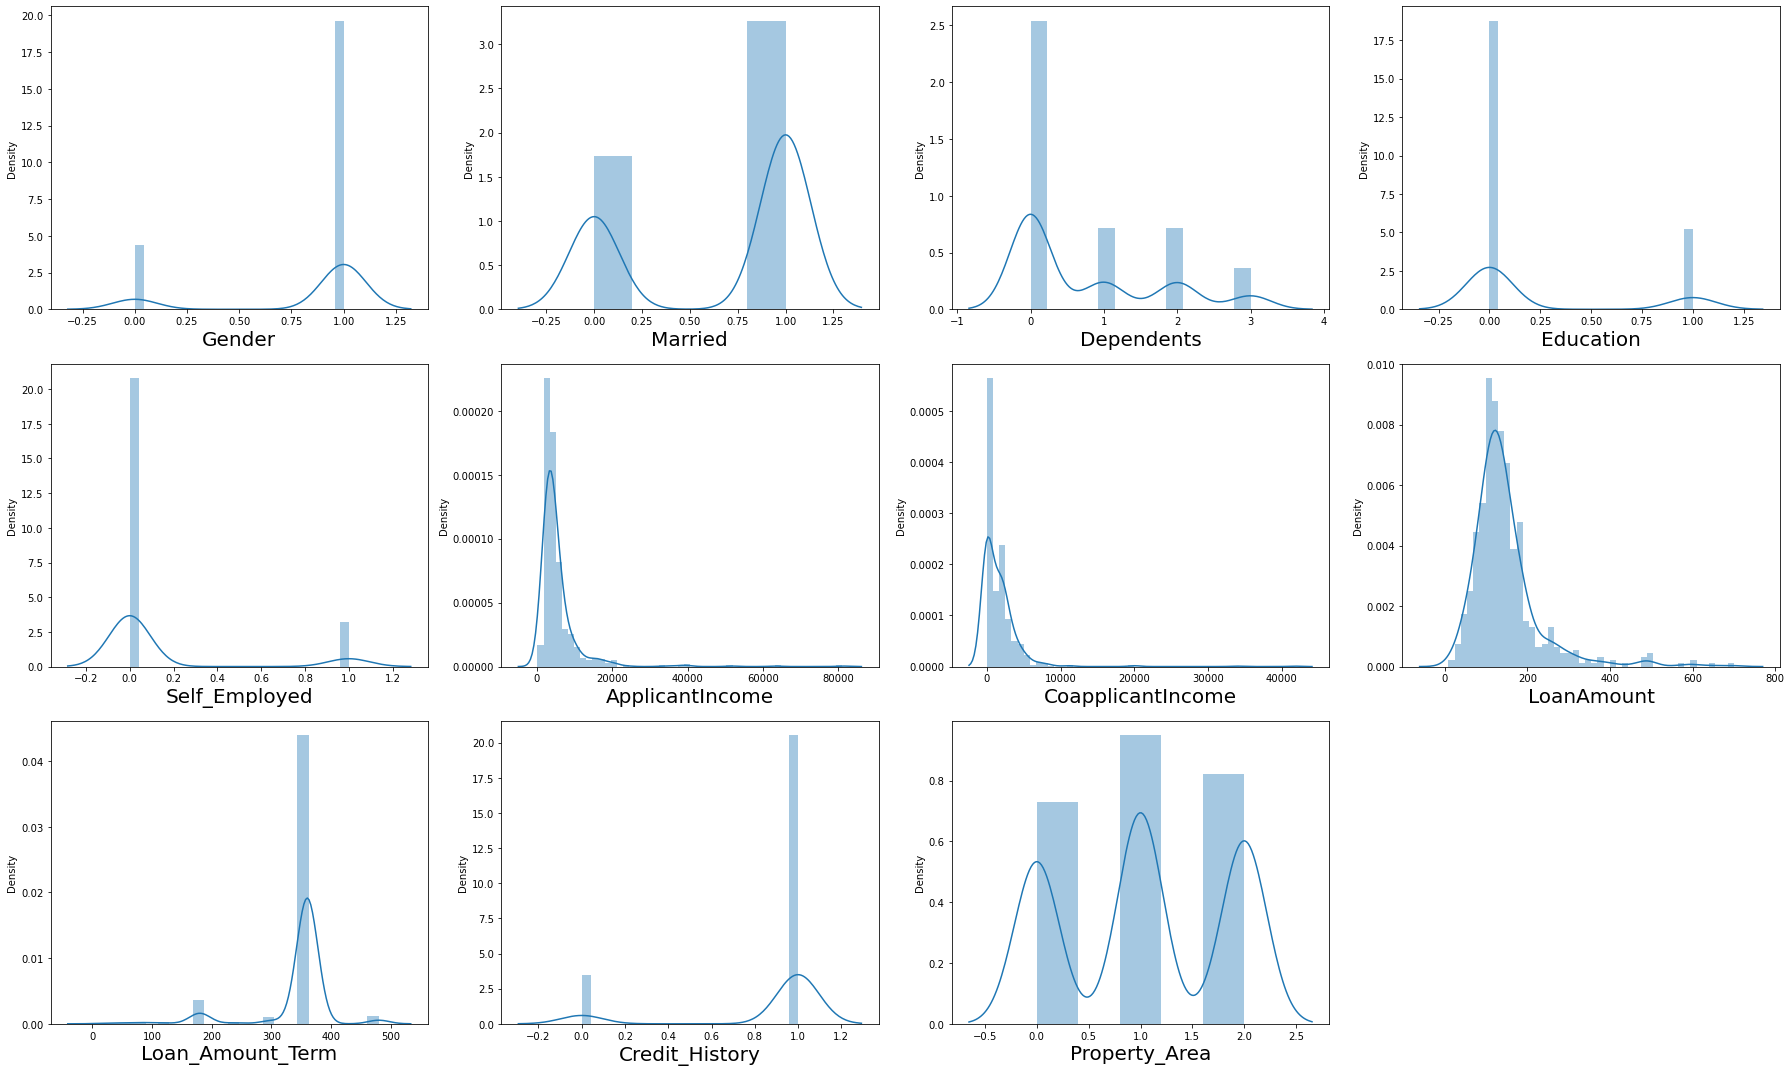

In [17]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 12:
        ax = plt.subplot(3,4,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

- Gender, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term and Credit_History has skewness and can have outliers 
- Gender, Dependents, Education, Self_Employed, Loan_Amount_Term, Credit_History are classified columns hence not removing outliers 

In [18]:
df['Loan_Status'].value_counts()

1.0    422
0.0    192
Name: Loan_Status, dtype: int64

In [19]:
df.drop('Loan_Status',axis=1).corrwith(df.Loan_Status)

Gender               0.017987
Married              0.091478
Dependents           0.010118
Education           -0.085884
Self_Employed       -0.003700
ApplicantIncome     -0.004710
CoapplicantIncome   -0.059187
LoanAmount          -0.036416
Loan_Amount_Term    -0.022549
Credit_History       0.540556
Property_Area        0.032112
dtype: float64

Gender, Dependents, Self_Employed, ApplicantIncome, and Loan_Amount_Term have less or no corelation with label

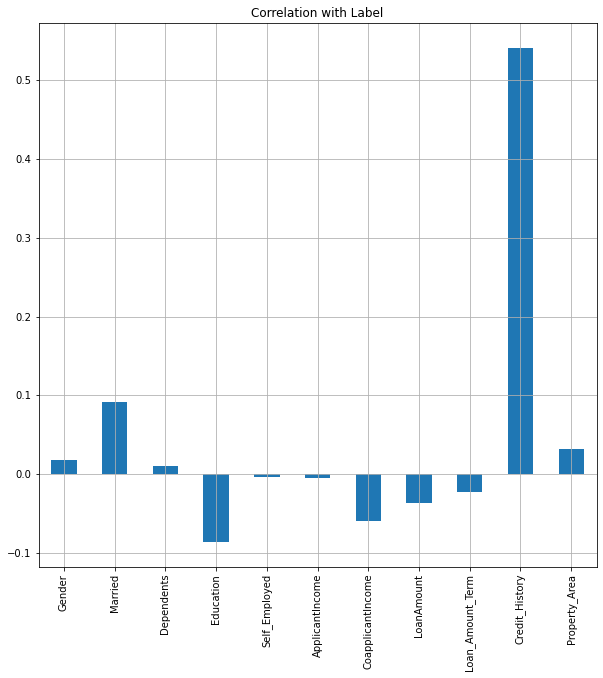

In [20]:
df.drop('Loan_Status',axis=1).corrwith(df.Loan_Status).plot(kind='bar',grid=True,figsize=(10,10),
                                                     title="Correlation with Label")
plt.show()

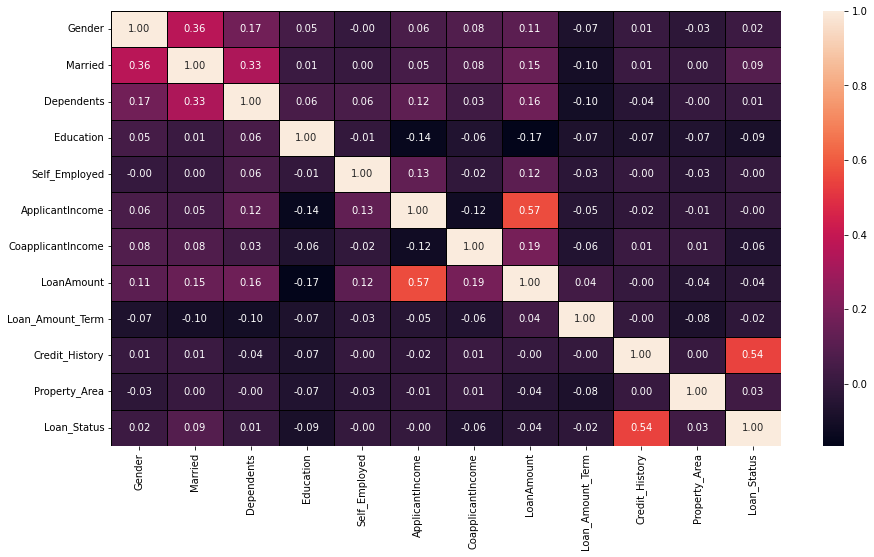

In [21]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,linecolor='black',fmt = '.2f')
plt.show()

In [22]:
df = df.drop(['Self_Employed', 'ApplicantIncome'],axis=1)

Deleting 'Self_Employed' and 'ApplicantIncome' since it has no corelation with label

Multicollinearity problem does not exist in this database

In [23]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [24]:
x = df[['Gender', 'Married', 'Dependents', 'Education', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']]

In [25]:
vif = pd.DataFrame()
vif["Features"] = x.columns

In [26]:
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

In [27]:
vif

,Features,VIF
0,Gender,5.988964
1,Married,3.647723
2,Dependents,1.784934
3,Education,1.300372
4,CoapplicantIncome,1.364966
5,LoanAmount,4.355778
6,Loan_Amount_Term,10.271447
7,Credit_History,6.053629
8,Property_Area,2.569593


- Loan_Amount_Term has high VIF but it is very important column in this case study while predicting Loan_Status

In [28]:
df.head()

,Gender,Married,Dependents,Education,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,141.000000,360.0,1.0,2.0,1.0


In [29]:
df.describe()

,Gender,Married,Dependents,Education,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,1621.245798,146.412162,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,2926.248369,84.037468,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


Database is ready to remove outliers if exist 

In [30]:
x = df.drop(['Loan_Status'],axis=1)
y = df['Loan_Status']

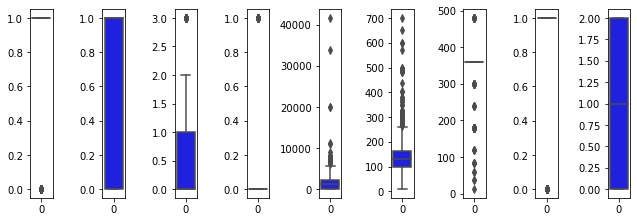

In [31]:
a = x.columns.values
col = 30
row = 14
plt.figure(figsize = (col,3*row))
for i in range(0, len(a)):
    plt.subplot(row,col,i+1)
    sns.boxplot(data = x[a[i]],color='blue',orient='v')
    plt.tight_layout()

Outliers are present in Gender, Dependents, Education, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History and Property_Area 

In [32]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

Gender, Dependents, Education, Loan_Amount_Term, Credit_History and Property_Area are classified columns hence have not removed outliers

In [33]:
old_data = (df.shape)[0]

In [34]:
q1 = df['CoapplicantIncome'].quantile(0.25)
q3 = df['CoapplicantIncome'].quantile(0.75)
iqr = q3 - q1

upper = np.where(df['CoapplicantIncome'] > (q3+1.5*iqr))
lower = np.where(df['CoapplicantIncome'] < (q1-1.5*iqr))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed Outliers from CoapplicantIncome column

In [35]:
q1 = df['LoanAmount'].quantile(0.25)
q3 = df['LoanAmount'].quantile(0.75)
iqr = q3 - q1

upper = np.where(df['LoanAmount'] > (q3+1.5*iqr))
lower = np.where(df['LoanAmount'] < (q1-1.5*iqr))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed Outliers from LoanAmount column

In [36]:
new_data = (df.shape)[0]

In [37]:
data_loss = old_data - new_data
print('Lost', data_loss,'no. of Data')

Lost 63 no. of Data


In [38]:
x = df.drop(['Loan_Status'],axis=1)
y = df['Loan_Status']

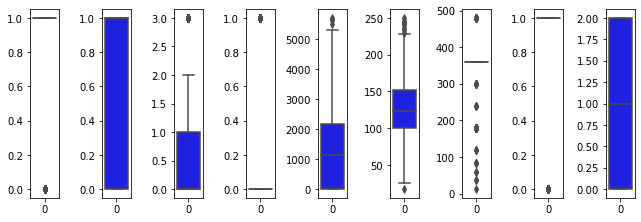

In [39]:
a = x.columns.values
col = 30
row = 14
plt.figure(figsize = (col,3*row))
for i in range(0, len(a)):
    plt.subplot(row,col,i+1)
    sns.boxplot(data = x[a[i]],color='blue',orient='v')
    plt.tight_layout()

Removed Outliers that are not allowed above and below the specified limit

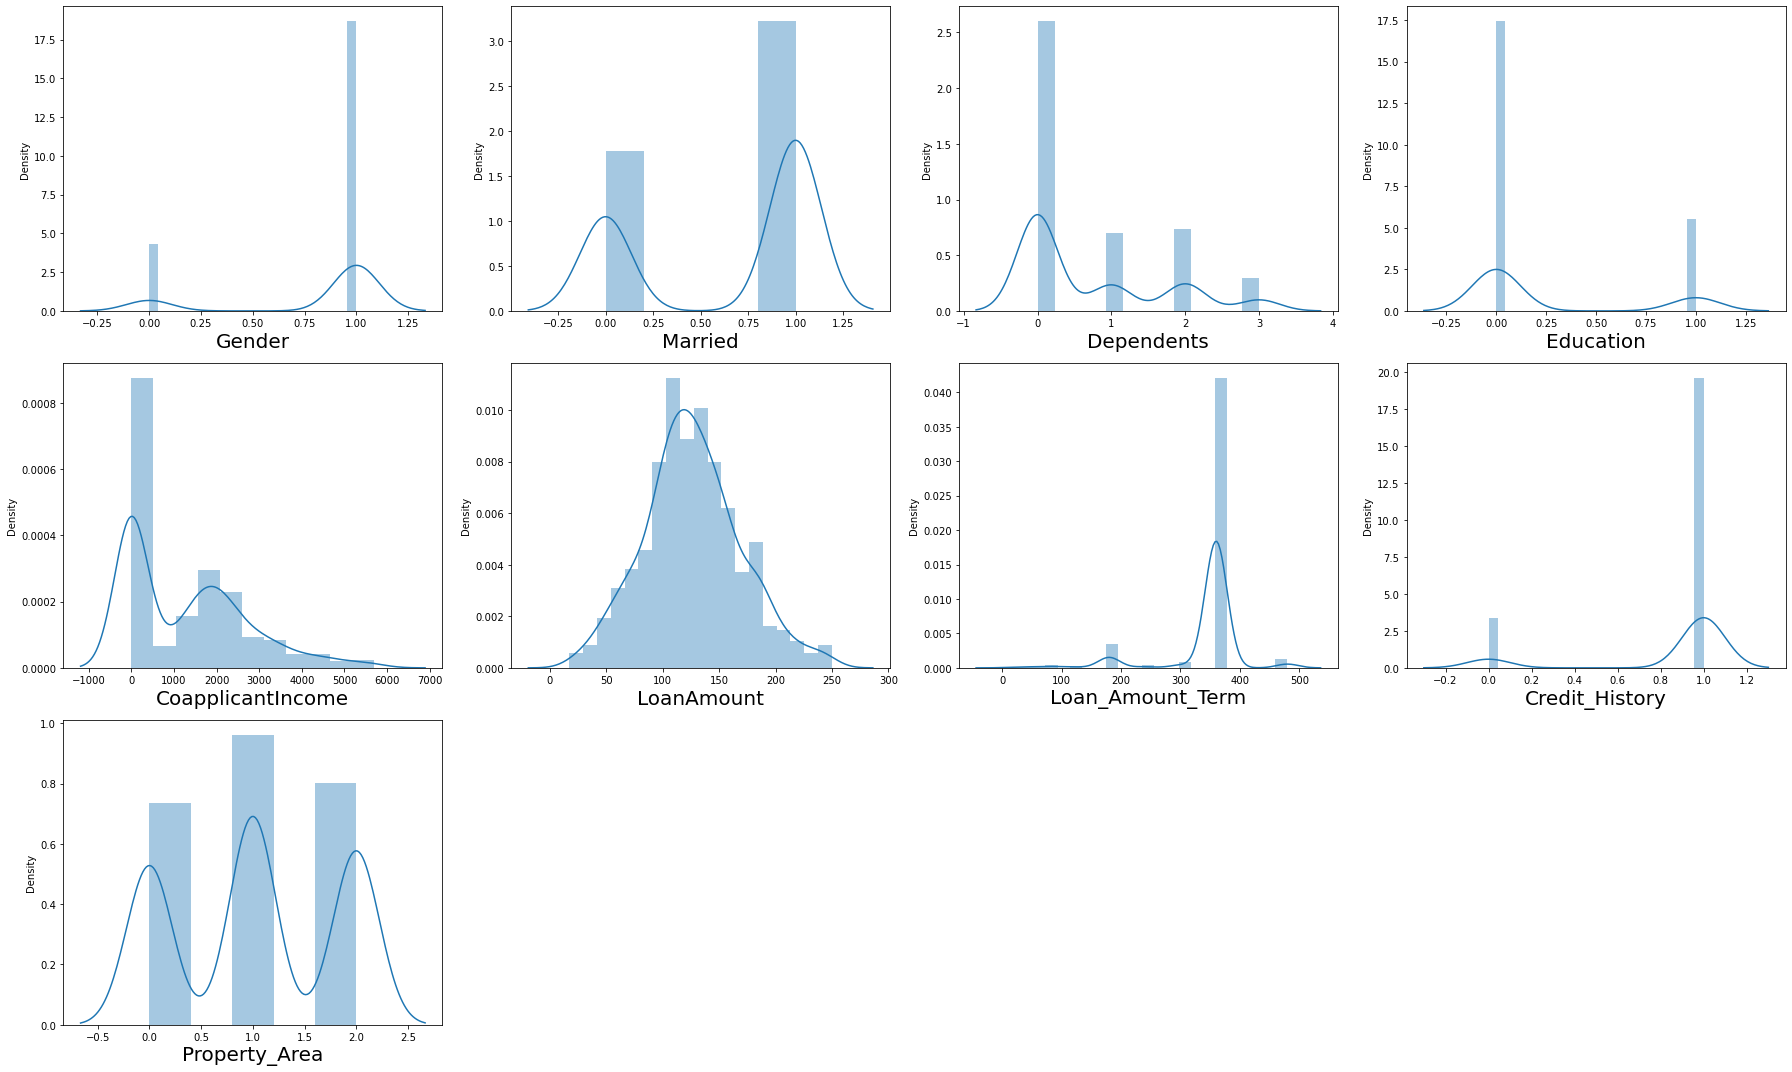

In [40]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 12:
        ax = plt.subplot(3,4,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

There is a skewness present in the data hence using PowerTransformer to remove it

In [41]:
scaler = PowerTransformer(method='yeo-johnson')

In [42]:
df[['CoapplicantIncome']] = scaler.fit_transform(df[['CoapplicantIncome']].values)

In [43]:
x = df.drop(['Loan_Status'],axis=1)
y = df['Loan_Status']

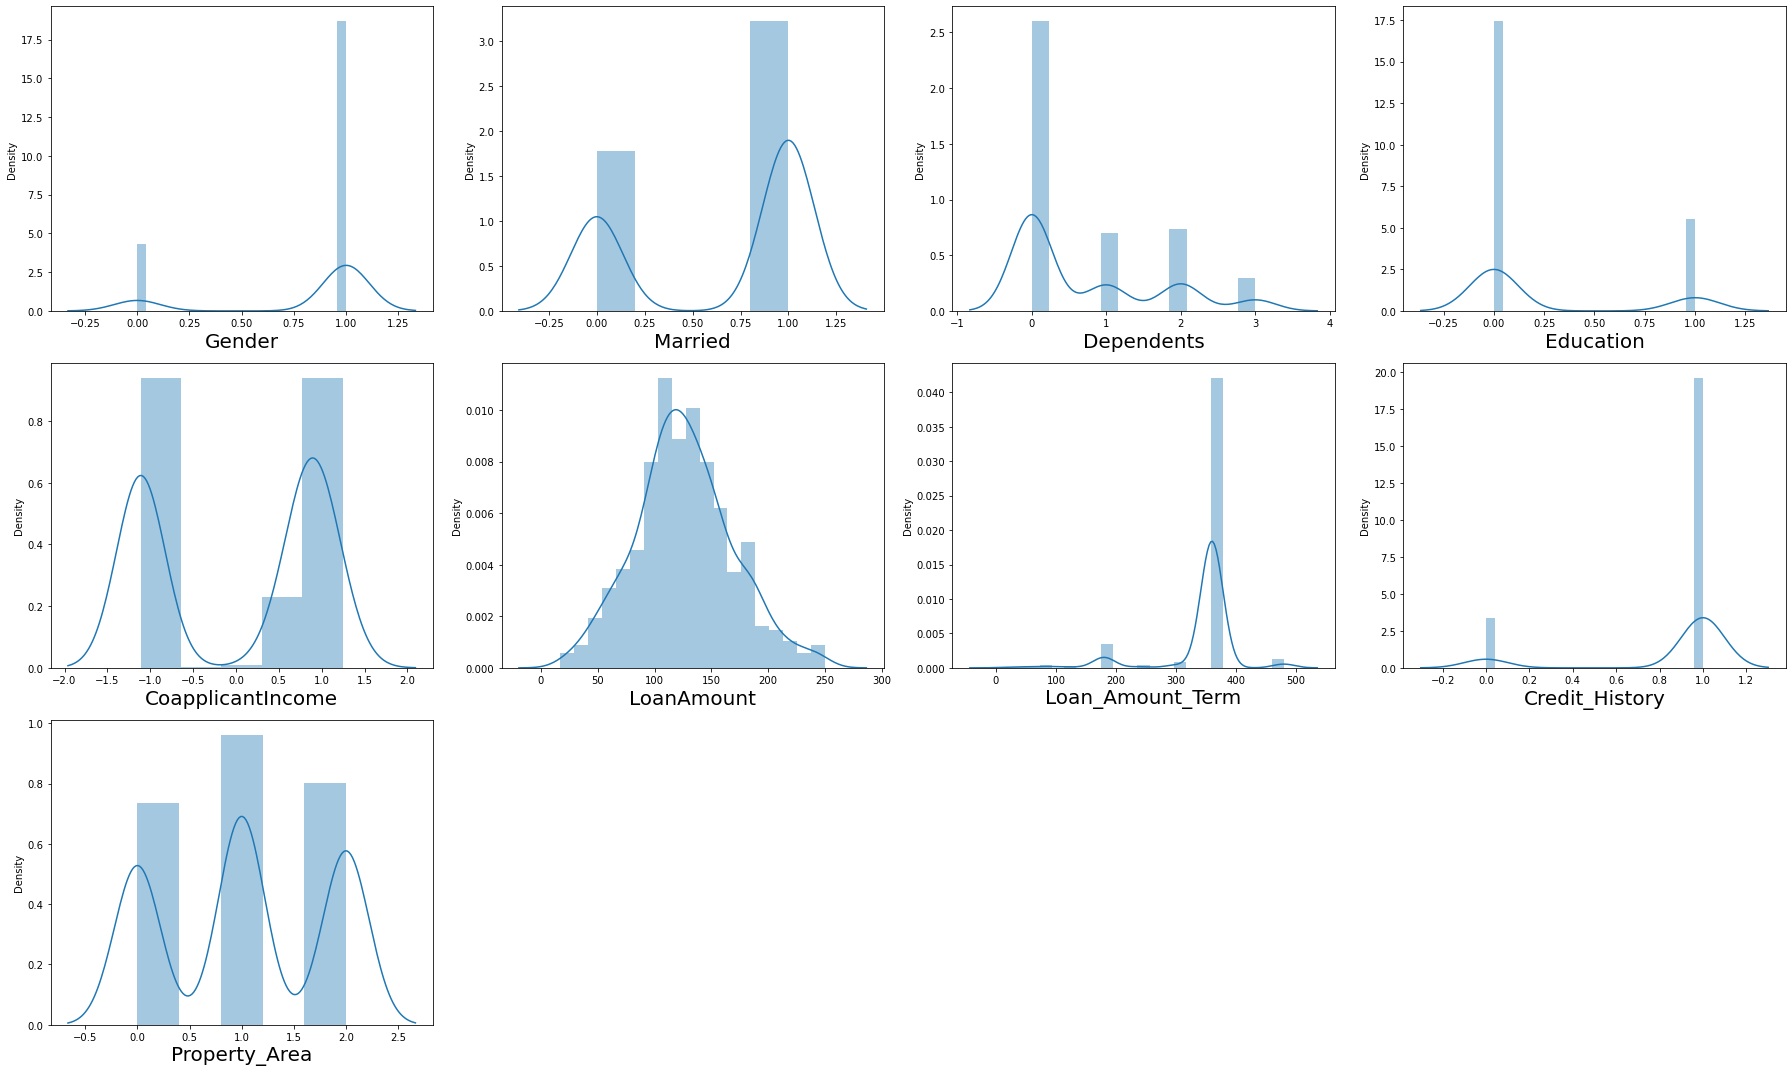

In [44]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 12:
        ax = plt.subplot(3,4,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

Removed skewness from the data

In [45]:
x = df.drop(['Loan_Status'],axis=1)
y = df['Loan_Status']

In [46]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(x)

Scaling the data

In [47]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.01,random_state = 65)

Have added test_size small so that we can not loose train data 

In [48]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
ove_smp=SMOTE(0.75)

x_train_new, y_train_new = ove_smp.fit_sample(x_train, y_train)

In [49]:
print (y_train.value_counts())
print (y_train_new.value_counts())

1.0    381
0.0    164
Name: Loan_Status, dtype: int64
1.0    381
0.0    285
Name: Loan_Status, dtype: int64


In [50]:
X_scale = x_train_new
y = y_train_new

# Model Buidling

# LogisticRegression

In [51]:
maxAccu =0 
maxRS= 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = i)
    log = LogisticRegression()
    log.fit(x_train,y_train)
    y_pred=log.predict(x_test)
    acc=accuracy_score(y_test, y_pred)
    print('accuracy', acc,'Random_state',i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('max_accuracy', maxAccu,'max_Random_state',i)

accuracy 0.7125748502994012 Random_state 1
max_accuracy 0.7125748502994012 max_Random_state 1
accuracy 0.7784431137724551 Random_state 2
max_accuracy 0.7784431137724551 max_Random_state 2
accuracy 0.7904191616766467 Random_state 3
max_accuracy 0.7904191616766467 max_Random_state 3
accuracy 0.7485029940119761 Random_state 4
accuracy 0.7964071856287425 Random_state 5
max_accuracy 0.7964071856287425 max_Random_state 5
accuracy 0.7844311377245509 Random_state 6
accuracy 0.7485029940119761 Random_state 7
accuracy 0.7604790419161677 Random_state 8
accuracy 0.7724550898203593 Random_state 9
accuracy 0.7485029940119761 Random_state 10
accuracy 0.7604790419161677 Random_state 11
accuracy 0.7425149700598802 Random_state 12
accuracy 0.7664670658682635 Random_state 13
accuracy 0.8203592814371258 Random_state 14
max_accuracy 0.8203592814371258 max_Random_state 14
accuracy 0.7485029940119761 Random_state 15
accuracy 0.7365269461077845 Random_state 16
accuracy 0.7485029940119761 Random_state 17
accur

In [61]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = 44)

In [62]:
def print_score(clf, x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        
        print('\n===============Train Result===============')
        print(f'Accuracy Score: {accuracy_score(y_train, y_pred)*100:.2f}%')
        
        
    elif train==False:
        pred = clf.predict(x_test)
        
        print('\n===============Test Result===============')
        print(f'Accuracy Score: {accuracy_score(y_test, pred)*100:.2f}%')
        
        print('\n \n Test Classification Report \n', classification_report(y_test, pred, digits=2))
        
        scr_log = cross_val_score(clf,X_scale,y,cv=5)
        print('Cross Validation Score- ', scr_log.mean())

In [63]:
log = LogisticRegression()
log.fit(x_train,y_train)

print_score(log,x_train,x_test,y_train,y_test, train=True)
print_score(log,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 74.55%

===============Test Result===============
Accuracy Score: 84.43%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       1.00      0.61      0.76        67
         1.0       0.79      1.00      0.88       100

    accuracy                           0.84       167
   macro avg       0.90      0.81      0.82       167
weighted avg       0.88      0.84      0.83       167

Cross Validation Score-  0.7688026035237348


# RandomForestClassifier

In [64]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

print_score(rfc,x_train,x_test,y_train,y_test, train=True)
print_score(rfc,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 99.80%

===============Test Result===============
Accuracy Score: 84.43%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.84      0.76      0.80        67
         1.0       0.85      0.90      0.87       100

    accuracy                           0.84       167
   macro avg       0.84      0.83      0.84       167
weighted avg       0.84      0.84      0.84       167

Cross Validation Score-  0.8139153854786219


# DecisionTreeClassifier

In [65]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

print_score(dtc,x_train,x_test,y_train,y_test, train=True)
print_score(dtc,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 99.80%

===============Test Result===============
Accuracy Score: 80.84%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.72      0.85      0.78        67
         1.0       0.89      0.78      0.83       100

    accuracy                           0.81       167
   macro avg       0.80      0.82      0.81       167
weighted avg       0.82      0.81      0.81       167

Cross Validation Score-  0.750847267422287


# GradientBoostingClassifier

In [66]:
gbdt = GradientBoostingClassifier()
gbdt.fit(x_train,y_train)

print_score(gbdt,x_train,x_test,y_train,y_test, train=True)
print_score(gbdt,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 89.18%

===============Test Result===============
Accuracy Score: 84.43%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.84      0.76      0.80        67
         1.0       0.85      0.90      0.87       100

    accuracy                           0.84       167
   macro avg       0.84      0.83      0.84       167
weighted avg       0.84      0.84      0.84       167

Cross Validation Score-  0.7883402536191224


# Support Vector Classifier

In [67]:
svc = SVC()
svc.fit(x_train,y_train)

print_score(svc,x_train,x_test,y_train,y_test, train=True)
print_score(svc,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 78.36%

===============Test Result===============
Accuracy Score: 82.04%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.88      0.64      0.74        67
         1.0       0.80      0.94      0.86       100

    accuracy                           0.82       167
   macro avg       0.84      0.79      0.80       167
weighted avg       0.83      0.82      0.81       167

Cross Validation Score-  0.7673325103804286


# KNeighborsClassifier

In [68]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

print_score(knn,x_train,x_test,y_train,y_test, train=True)
print_score(knn,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 83.17%

===============Test Result===============
Accuracy Score: 76.65%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.70      0.73      0.72        67
         1.0       0.81      0.79      0.80       100

    accuracy                           0.77       167
   macro avg       0.76      0.76      0.76       167
weighted avg       0.77      0.77      0.77       167

Cross Validation Score-  0.7462911008865447


# Findings

- LogisticsRegression - Cross Validation Score is 76.88%, Accuracy Score of Train Result is 74.55% and Test Result is 84.43%
- RandomForestClassifier - Cross Validation Score is 81.39%, Accuracy Score of Train Result is 99.80% and Test Result is 84.43%
- DecisionTreeClassifier - Cross Validation Score is 75.08%, Accuracy Score of Train Result is 99.80% and Test Result is 80.84%
- GradientBoostingClassifier - Cross Validation Score is 78.83%, Accuracy Score of Train Result is 89.18% and Test Result is 84.43%
- Support Vector Classifier - Cross Validation Score is 76.73%, Accuracy Score of Train Result is 78.36% and Test Result is 82.04%
- KNeighborsClassifier - Cross Validation Score is 74.62%, Accuracy Score of Train Result is 83.17% and Test Result is 76.65%

###### Choosing Support Vector Classifier since it has low variance and high accuracy

# Hyper Parameter Tuning

In [71]:
grid_param = {
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'C': range(1,20),
    'decision_function_shape': ['ovo', 'ovr']
}

Selecting Parameters for Hyper Parameter Tuning

In [73]:
grid_search = GridSearchCV(estimator=svc,
                          param_grid=grid_param,
                          cv=3,
                          n_jobs =-1)

Searching the best grid for the model

In [74]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': range(1, 20),
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid']})

Training the model (Note:- Have not added more parameters since it was taking a long time to train and the laptop is not that powerful to load this code hence have removed some parameters)

In [75]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'C': 1, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'linear'}


In [76]:
svc = SVC(C= 1, kernel='linear', gamma='scale', decision_function_shape='ovo')
svc.fit(x_train,y_train)

SVC(C=1, decision_function_shape='ovo', kernel='linear')

- Applying best parameters to train the model
- Using C=1 Since it gives a better result

In [77]:
y_pred = svc.predict(x_test)
pred = svc.predict(x_train)

In [78]:
print(f'Train Accuracy Score: {accuracy_score(y_train, pred)*100:.2f}%')
print(f'Test Accuracy Score: {accuracy_score(y_test, y_pred)*100:.2f}%')
print(classification_report(y_test, y_pred))

Train Accuracy Score: 74.35%
Test Accuracy Score: 84.43%
              precision    recall  f1-score   support

         0.0       1.00      0.61      0.76        67
         1.0       0.79      1.00      0.88       100

    accuracy                           0.84       167
   macro avg       0.90      0.81      0.82       167
weighted avg       0.88      0.84      0.83       167



- Previous Test Accuracy Score 82.04% and New Test Accuracy score 84.43%
- Previous Train Accuracy Score 78.36% and New Train Accuracy score 74.35%

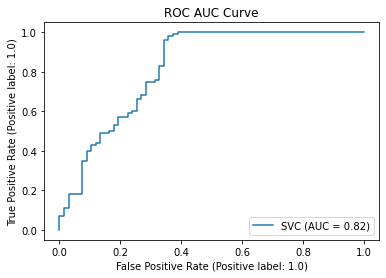

In [79]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svc,x_test,y_test)
plt.title("ROC AUC Curve")
plt.show()

#### Accuracy score of Support Vector Classifier after Tuning the model is 84.43% and AUC score is 82% which is pretty good

# Saving the Model

In [80]:
file = 'Loan_Application_Status.pickle'
pickle.dump(svc, open(file, 'wb'))